# Data Cleaning

* Data used: *"China HRC Price Model - Edited Combined Data.csv"*

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
## use this part, if you are using google colab
#from google.colab import drive
#drive.mount('/content/drive')

## Data Loading

In [3]:
# Load the data and check the first few lines
dataset_path = "../data/raw/China HRC Price Model - Edited Combined Data.csv"
df = pd.read_csv(dataset_path)
df.head()

,Month,"HRC \n(FOB, $/t)","Iron Ore \n(CFR, $/t)","HCC \n(Aus FOB, $/t)",Domestic Scrap (DDP Jiangsu incl. VAT $/t),RM Cost \n($/t),HRC - RM \nSpread ($/t),CS Production (Mnt),Exports \n(Mnt),Imports \n(Mnt),Net Exports (Mnt),Export as % of Production,Cummulative FAI growth (%),ACSU \n(Mnt),Monthly Imports of semis & finished steel (Mt.),Monthly Export of semis & finished steel (Mt.),Monthly Iron ore Imports (Mt.),YTD Iron ore Imports (Mt.),YTD Iron ore Production (Mt.),Monthly Iron ore Production (Mt.),Stocks of iron ore at China's seaport (Mt.),YTD Growth rate of Investment (Fixed asset investment),Fixed asset investment in real estate development in urban areas (y-o-y )Growth,Floor space under construction (y-o-y),Automobile Production (y-o-y),Civil Metal-Vessels/Steel Ships (y-o-y),Household Fridges (y-o-y),Air Conditioner (y-o-y),Manufacturing PMI for steel
0,Jan-06,388,47,125,248,200,187,30.0,2.0,2.0,0.0,7%,26.60%,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feb-06,388,48,125,248,202,185,30.0,2.0,1.0,1.0,7%,26.60%,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mar-06,449,50,125,251,205,244,33.0,3.0,2.0,1.0,9%,29.80%,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apr-06,478,57,116,257,207,271,35.0,3.0,2.0,1.0,9%,29.60%,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,May-06,505,56,116,263,205,300,36.0,4.0,2.0,3.0,12%,30.30%,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Month', 'HRC \n(FOB, $/t)', 'Iron Ore \n(CFR, $/t)',
       'HCC \n(Aus FOB, $/t)', 'Domestic Scrap (DDP Jiangsu incl. VAT $/t)',
       'RM Cost \n($/t)', 'HRC - RM \nSpread ($/t)', 'CS Production (Mnt)',
       'Exports \n(Mnt)', 'Imports \n(Mnt)', 'Net Exports (Mnt)',
       'Export as % of Production', 'Cummulative FAI growth (%)',
       'ACSU \n(Mnt)', 'Monthly Imports of semis & finished steel (Mt.)',
       'Monthly Export of semis & finished steel (Mt.)',
       'Monthly Iron ore Imports (Mt.)', 'YTD Iron ore Imports (Mt.)',
       'YTD Iron ore Production (Mt.)', 'Monthly Iron ore Production (Mt.)',
       'Stocks of iron ore at China's seaport (Mt.)',
       'YTD Growth rate of  Investment  (Fixed asset investment)',
       'Fixed asset investment in real estate development in urban areas (y-o-y )Growth',
       'Floor space under construction (y-o-y)',
       'Automobile Production (y-o-y)',
       'Civil Metal-Vessels/Steel Ships (y-o-y)', 'Household Fridges (y-o-y

In [5]:
df.rename(columns={'HRC \n(FOB, $/t)':'HRC (FOB, $/t)', 'Iron Ore \n(CFR, $/t)': 'Iron Ore (CFR, $/t)',
                   'HCC \n(Aus FOB, $/t)': 'HCC (Aus FOB, $/t)', 'RM Cost \n($/t)': 'RM Cost ($/t)',
                   #'Domestic Scrap (DDP Jiangsu incl. VAT $/t)' : 'Domestic Scrap (DDP Jiangsu incl. VAT \$/t)',
                   'HRC - RM \nSpread ($/t)': 'HRC - RM Spread ($/t)', 'Exports \n(Mnt)': 'Exports (Mnt)',
                   'Imports \n(Mnt)': 'Imports (Mnt)', 'ACSU \n(Mnt)': 'ACSU (Mnt)',
                   'YTD Growth rate of  Investment  (Fixed asset investment)': 'YTD Growth rate of Investment (FAI)',
                   'Fixed asset investment in real estate development in urban areas (y-o-y )Growth':
                       'FAI in urban real estate development (y-o-y) Growth'},
          inplace=True)

In [6]:
df

,Month,"HRC (FOB, $/t)","Iron Ore (CFR, $/t)","HCC (Aus FOB, $/t)",Domestic Scrap (DDP Jiangsu incl. VAT $/t),RM Cost ($/t),HRC - RM Spread ($/t),CS Production (Mnt),Exports (Mnt),Imports (Mnt),Net Exports (Mnt),Export as % of Production,Cummulative FAI growth (%),ACSU (Mnt),Monthly Imports of semis & finished steel (Mt.),Monthly Export of semis & finished steel (Mt.),Monthly Iron ore Imports (Mt.),YTD Iron ore Imports (Mt.),YTD Iron ore Production (Mt.),Monthly Iron ore Production (Mt.),Stocks of iron ore at China's seaport (Mt.),YTD Growth rate of Investment (FAI),FAI in urban real estate development (y-o-y) Growth,Floor space under construction (y-o-y),Automobile Production (y-o-y),Civil Metal-Vessels/Steel Ships (y-o-y),Household Fridges (y-o-y),Air Conditioner (y-o-y),Manufacturing PMI for steel
0,Jan-06,388,47,125,248,200,187,30.0,2.0,2.0,0.0,7%,26.60%,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feb-06,388,48,125,248,202,185,30.0,2.0,1.0,1.0,7%,26.60%,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mar-06,449,50,125,251,205,244,33.0,3.0,2.0,1.0,9%,29.80%,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apr-06,478,57,116,257,207,271,35.0,3.0,2.0,1.0,9%,29.60%,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,May-06,505,56,116,263,205,300,36.0,4.0,2.0,3.0,12%,30.30%,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Sep-24,453,94,187,337,337,116,77.0,10.0,1.0,10.0,13%,3%,66.0,0.55,10.15,103.92,918.87,781.4,84.88,157.93,3.40%,-10.10%,-12.20%,2.70%,1.10%,7.50%,8.00%,49
225,Oct-24,497,104,204,354,370,127,82.0,11.0,1.0,11.0,14%,3%,70.0,0.54,11.18,103.84,1022.53,871.5,90.16,160.47,3.40%,-10.30%,-12.40%,3.00%,1.30%,8.50%,8.20%,54.6
226,Nov-24,485,102,204,353,368,117,78.0,9.0,0.0,9.0,12%,NaN,NaN,0.47,9.28,101.86,NaN,NaN,NaN,156.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.6
227,Dec-24,473,104,200,356,366,107,76.0,10.0,1.0,9.0,13%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Check
* Missing data in columns.
* Duplicates.
* Data types.

In [7]:
df.isnull().sum()

Month                                                   0
HRC (FOB, $/t)                                          0
Iron Ore (CFR, $/t)                                     0
HCC (Aus FOB, $/t)                                      0
Domestic Scrap (DDP Jiangsu incl. VAT $/t)              0
RM Cost ($/t)                                           0
HRC - RM Spread ($/t)                                   0
CS Production (Mnt)                                     1
Exports (Mnt)                                           1
Imports (Mnt)                                           1
Net Exports (Mnt)                                       1
Export as % of Production                               1
Cummulative FAI growth (%)                              4
ACSU (Mnt)                                              3
Monthly Imports of semis & finished steel (Mt.)        20
Monthly Export of semis & finished steel (Mt.)         23
Monthly Iron ore Imports (Mt.)                         33
YTD Iron ore I

In [8]:
df.duplicated().sum()

0

## Data Cleaning

### Convert `str` to numeric
As some column values are in string format with percentage sign (%), we delete the sign and convert them to float format.

In [9]:
# Check for columns with string values
df.dtypes[df.dtypes == 'object'].index

Index(['Month', 'Export as % of Production', 'Cummulative FAI growth (%)',
       'YTD Growth rate of Investment (FAI)',
       'FAI in urban real estate development (y-o-y) Growth',
       'Floor space under construction (y-o-y)',
       'Automobile Production (y-o-y)',
       'Civil Metal-Vessels/Steel Ships (y-o-y)', 'Household Fridges (y-o-y)',
       'Air Conditioner (y-o-y)', 'Manufacturing PMI for steel'],
      dtype='object')

In [10]:
# Delete % sign from column values
col_w_perc = df.dtypes[df.dtypes == 'object'].index

for col in col_w_perc:
    if col == 'Month':
        continue
    df[col] = df[col].apply(lambda x: str(x).rstrip('%') if isinstance(x, str) else x)
    df[col] = pd.to_numeric(df[col])

df.head()

,Month,"HRC (FOB, $/t)","Iron Ore (CFR, $/t)","HCC (Aus FOB, $/t)",Domestic Scrap (DDP Jiangsu incl. VAT $/t),RM Cost ($/t),HRC - RM Spread ($/t),CS Production (Mnt),Exports (Mnt),Imports (Mnt),Net Exports (Mnt),Export as % of Production,Cummulative FAI growth (%),ACSU (Mnt),Monthly Imports of semis & finished steel (Mt.),Monthly Export of semis & finished steel (Mt.),Monthly Iron ore Imports (Mt.),YTD Iron ore Imports (Mt.),YTD Iron ore Production (Mt.),Monthly Iron ore Production (Mt.),Stocks of iron ore at China's seaport (Mt.),YTD Growth rate of Investment (FAI),FAI in urban real estate development (y-o-y) Growth,Floor space under construction (y-o-y),Automobile Production (y-o-y),Civil Metal-Vessels/Steel Ships (y-o-y),Household Fridges (y-o-y),Air Conditioner (y-o-y),Manufacturing PMI for steel
0,Jan-06,388,47,125,248,200,187,30.0,2.0,2.0,0.0,7.0,26.6,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feb-06,388,48,125,248,202,185,30.0,2.0,1.0,1.0,7.0,26.6,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mar-06,449,50,125,251,205,244,33.0,3.0,2.0,1.0,9.0,29.8,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apr-06,478,57,116,257,207,271,35.0,3.0,2.0,1.0,9.0,29.6,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,May-06,505,56,116,263,205,300,36.0,4.0,2.0,3.0,12.0,30.3,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.to_csv('../data/processed/after_perc.csv', index=False)

### Convert Month into Month and Year

In [12]:
# Convert 'Month' column to datetime format
df['Date'] = pd.to_datetime(df['Month'], format='%b-%y')

# Move column 'Date' to the front
df = df[['Date'] + [col for col in df.columns if col not in ['Date']]]
df.head()

,Date,Month,"HRC (FOB, $/t)","Iron Ore (CFR, $/t)","HCC (Aus FOB, $/t)",Domestic Scrap (DDP Jiangsu incl. VAT $/t),RM Cost ($/t),HRC - RM Spread ($/t),CS Production (Mnt),Exports (Mnt),Imports (Mnt),Net Exports (Mnt),Export as % of Production,Cummulative FAI growth (%),ACSU (Mnt),Monthly Imports of semis & finished steel (Mt.),Monthly Export of semis & finished steel (Mt.),Monthly Iron ore Imports (Mt.),YTD Iron ore Imports (Mt.),YTD Iron ore Production (Mt.),Monthly Iron ore Production (Mt.),Stocks of iron ore at China's seaport (Mt.),YTD Growth rate of Investment (FAI),FAI in urban real estate development (y-o-y) Growth,Floor space under construction (y-o-y),Automobile Production (y-o-y),Civil Metal-Vessels/Steel Ships (y-o-y),Household Fridges (y-o-y),Air Conditioner (y-o-y),Manufacturing PMI for steel
0,2006-01-01,Jan-06,388,47,125,248,200,187,30.0,2.0,2.0,0.0,7.0,26.6,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-02-01,Feb-06,388,48,125,248,202,185,30.0,2.0,1.0,1.0,7.0,26.6,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-03-01,Mar-06,449,50,125,251,205,244,33.0,3.0,2.0,1.0,9.0,29.8,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-04-01,Apr-06,478,57,116,257,207,271,35.0,3.0,2.0,1.0,9.0,29.6,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-05-01,May-06,505,56,116,263,205,300,36.0,4.0,2.0,3.0,12.0,30.3,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
type(df['Month'][0])

str

### Drop Columns - Correlation Analysis on Raw Data
We exclude the month and date, and the dependent variable (the one to be predicted) in the correlation testing process.

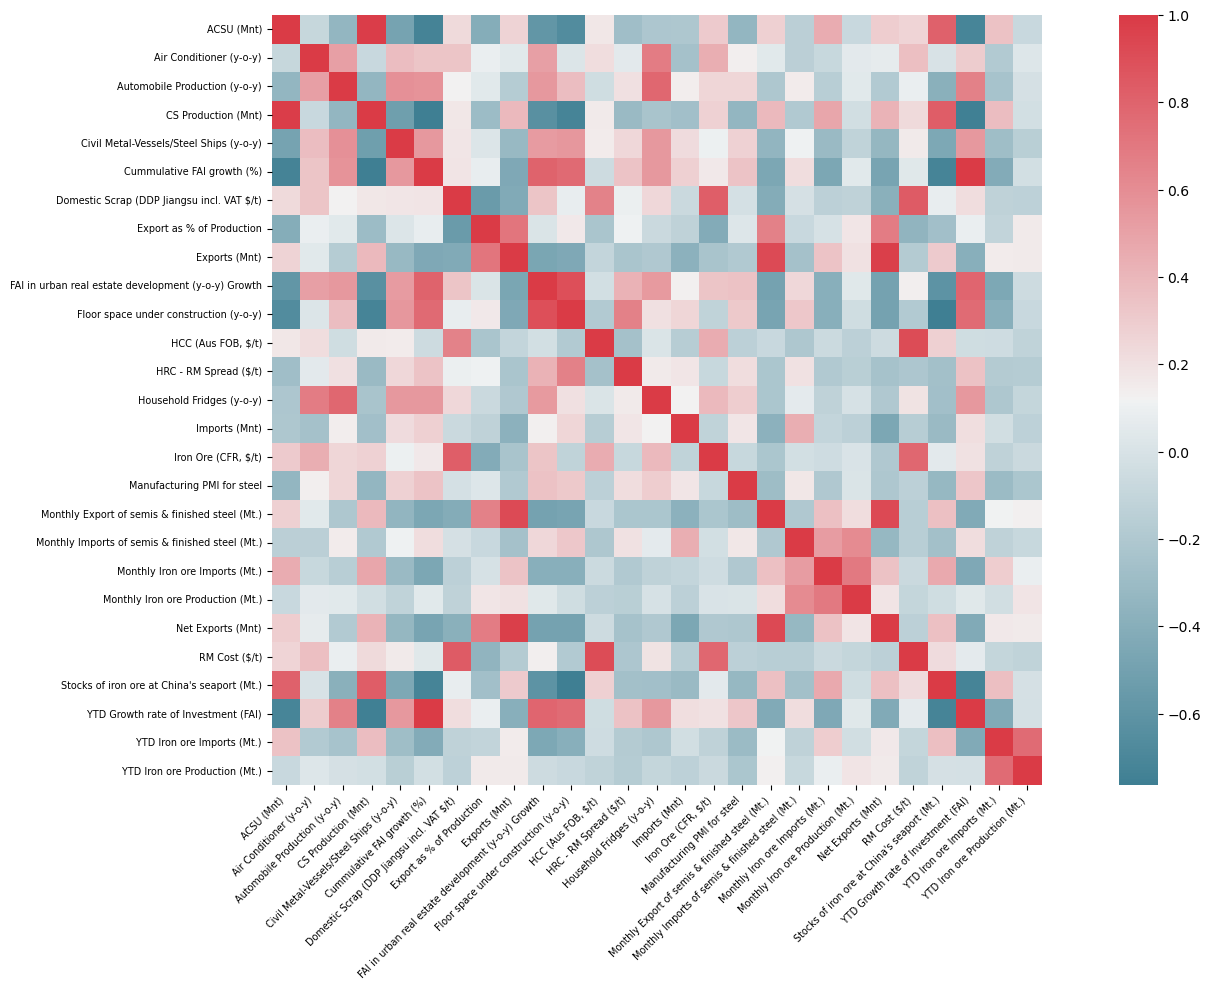

In [14]:
corrdata = df.loc[:, df.columns.difference(['Date', 'Month', 'HRC (FOB, $/t)'])]
corr = corrdata.corr()

fig = plt.figure(figsize=(20, 10))
sns.heatmap(corr, mask=np.zeros_like(corr), annot=False, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, fmt='.2f')
plt.yticks(ha='right', fontsize='x-small')
plt.xticks(rotation=45, ha='right', fontsize='x-small')
plt.show()

In [15]:
threshold = 0.8
high_corr_pairs = (
    corr.abs().where(np.triu(np.ones(corr.abs().shape), k=1).astype(bool))  # Keep only upper triangle
    .stack()  # Convert to Series
    .reset_index()
)

# Rename columns for clarity
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Filter pairs with correlation ≥ threshold
high_corr_pairs = pd.DataFrame(high_corr_pairs[high_corr_pairs['Correlation'] >= threshold])

# Compare the numbers of missing values in the correlated columns
missing_counts = df.isnull().sum()
high_corr_pairs['Missing Values (Var 1)'] = high_corr_pairs['Variable 1'].map(missing_counts)
high_corr_pairs['Missing Values (Var 2)'] = high_corr_pairs['Variable 2'].map(missing_counts)

# Display
high_corr_pairs

,Variable 1,Variable 2,Correlation,Missing Values (Var 1),Missing Values (Var 2)
2,ACSU (Mnt),CS Production (Mnt),0.983331,3,1
22,ACSU (Mnt),Stocks of iron ore at China's seaport (Mt.),0.810243,3,15
94,CS Production (Mnt),Stocks of iron ore at China's seaport (Mt.),0.829024,1,15
123,Cummulative FAI growth (%),FAI in urban real estate development (y-o-y) G...,0.803096,4,22
138,Cummulative FAI growth (%),YTD Growth rate of Investment (FAI),0.993914,4,23
149,Domestic Scrap (DDP Jiangsu incl. VAT $/t),"Iron Ore (CFR, $/t)",0.826307,0,0
156,Domestic Scrap (DDP Jiangsu incl. VAT $/t),RM Cost ($/t),0.839700,0,0
188,Exports (Mnt),Monthly Export of semis & finished steel (Mt.),0.919921,1,23
192,Exports (Mnt),Net Exports (Mnt),0.977306,1,1
198,FAI in urban real estate development (y-o-y) G...,Floor space under construction (y-o-y),0.902470,22,79


### Fill NaN Values with their Succeeding Values
As the values before September 2006 for columns in Data 2 are not collected, the missing data is not random, hence we are not imputing them with the succeeding values as advised by the project owner.

In [16]:
mask = df['Date'] > '2006-08-01'

# For rows after 'Aug-06', fill missing values with the previous row's value
df.loc[mask] = df.loc[mask].fillna(method='bfill')
df.head(20)

,Date,Month,"HRC (FOB, $/t)","Iron Ore (CFR, $/t)","HCC (Aus FOB, $/t)",Domestic Scrap (DDP Jiangsu incl. VAT $/t),RM Cost ($/t),HRC - RM Spread ($/t),CS Production (Mnt),Exports (Mnt),Imports (Mnt),Net Exports (Mnt),Export as % of Production,Cummulative FAI growth (%),ACSU (Mnt),Monthly Imports of semis & finished steel (Mt.),Monthly Export of semis & finished steel (Mt.),Monthly Iron ore Imports (Mt.),YTD Iron ore Imports (Mt.),YTD Iron ore Production (Mt.),Monthly Iron ore Production (Mt.),Stocks of iron ore at China's seaport (Mt.),YTD Growth rate of Investment (FAI),FAI in urban real estate development (y-o-y) Growth,Floor space under construction (y-o-y),Automobile Production (y-o-y),Civil Metal-Vessels/Steel Ships (y-o-y),Household Fridges (y-o-y),Air Conditioner (y-o-y),Manufacturing PMI for steel
0,2006-01-01,Jan-06,388,47,125,248,200,187,30.0,2.0,2.0,0.0,7.0,26.6,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-02-01,Feb-06,388,48,125,248,202,185,30.0,2.0,1.0,1.0,7.0,26.6,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-03-01,Mar-06,449,50,125,251,205,244,33.0,3.0,2.0,1.0,9.0,29.8,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-04-01,Apr-06,478,57,116,257,207,271,35.0,3.0,2.0,1.0,9.0,29.6,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-05-01,May-06,505,56,116,263,205,300,36.0,4.0,2.0,3.0,12.0,30.3,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2006-06-01,Jun-06,559,55,116,266,205,354,37.0,5.0,2.0,4.0,15.0,31.3,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2006-07-01,Jul-06,540,57,116,244,208,332,36.0,4.0,2.0,3.0,12.0,30.5,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2006-08-01,Aug-06,495,60,116,253,212,283,37.0,5.0,2.0,3.0,14.0,29.1,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2006-09-01,Sep-06,472,59,116,252,211,261,36.0,5.0,2.0,3.0,14.0,28.2,33.0,1.61,5.14,28.14,247.20,405.80,56.50,41.00,27.3,24.3,18.5,24.0,6.0,34.2,3.9,51.7
9,2006-10-01,Oct-06,477,62,85,260,185,292,38.0,5.0,1.0,4.0,14.0,26.8,34.0,1.42,5.19,21.97,297.69,462.30,56.50,40.77,26.8,24.1,18.8,25.1,11.4,31.8,6.7,55.9


In [17]:
df.to_csv('../data/processed/after_fillna.csv', index=False)

For model testing purpose, we drop all the rows with NaN values to avoid potential errors.

In [18]:
# Number of rows and columns BEFORE dropping rows with NaN values
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 229, Columns: 30


In [19]:
df.dropna(inplace=True)
df.to_csv('../data/final/wo_na_all_cols.csv', index=False)

In [20]:
# Number of rows and columns AFTER dropping rows with NaN values
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 218, Columns: 30


### Total Number of Independent Variables (Factors to be Used for Prediction)

#### Clarification
After receving advice from the project sponsor and performing the regression analysis between the HRC Price in China and each factor, we chose to keeps the following factors for the next phase of the project.

In [21]:
# Reexamine the data columns
df.columns

Index(['Date', 'Month', 'HRC (FOB, $/t)', 'Iron Ore (CFR, $/t)',
       'HCC (Aus FOB, $/t)', 'Domestic Scrap (DDP Jiangsu incl. VAT $/t)',
       'RM Cost ($/t)', 'HRC - RM Spread ($/t)', 'CS Production (Mnt)',
       'Exports (Mnt)', 'Imports (Mnt)', 'Net Exports (Mnt)',
       'Export as % of Production', 'Cummulative FAI growth (%)', 'ACSU (Mnt)',
       'Monthly Imports of semis & finished steel (Mt.)',
       'Monthly Export of semis & finished steel (Mt.)',
       'Monthly Iron ore Imports (Mt.)', 'YTD Iron ore Imports (Mt.)',
       'YTD Iron ore Production (Mt.)', 'Monthly Iron ore Production (Mt.)',
       'Stocks of iron ore at China's seaport (Mt.)',
       'YTD Growth rate of Investment (FAI)',
       'FAI in urban real estate development (y-o-y) Growth',
       'Floor space under construction (y-o-y)',
       'Automobile Production (y-o-y)',
       'Civil Metal-Vessels/Steel Ships (y-o-y)', 'Household Fridges (y-o-y)',
       'Air Conditioner (y-o-y)', 'Manufacturing PMI 

In [22]:
df['Monthly Export of Semis & Finished Steel as % of Production'] = df['Monthly Export of semis & finished steel (Mt.)'] / df['CS Production (Mnt)'] * 100

df = df[['Date', 'HRC (FOB, $/t)', 'Iron Ore (CFR, $/t)', 'HCC (Aus FOB, $/t)',
         'Domestic Scrap (DDP Jiangsu incl. VAT $/t)', 'HRC - RM Spread ($/t)',
         'Monthly Export of Semis & Finished Steel as % of Production',
         'FAI in urban real estate development (y-o-y) Growth',
         'Automobile Production (y-o-y)', 'Civil Metal-Vessels/Steel Ships (y-o-y)',
         'Household Fridges (y-o-y)', 'Air Conditioner (y-o-y)']]

df.head(12)

,Date,"HRC (FOB, $/t)","Iron Ore (CFR, $/t)","HCC (Aus FOB, $/t)",Domestic Scrap (DDP Jiangsu incl. VAT $/t),HRC - RM Spread ($/t),Monthly Export of Semis & Finished Steel as % of Production,FAI in urban real estate development (y-o-y) Growth,Automobile Production (y-o-y),Civil Metal-Vessels/Steel Ships (y-o-y),Household Fridges (y-o-y),Air Conditioner (y-o-y)
8,2006-09-01,472,59,116,252,261,14.277778,24.3,24.0,6.0,34.2,3.9
9,2006-10-01,477,62,85,260,292,13.657895,24.1,25.1,11.4,31.8,6.7
10,2006-11-01,470,62,84,262,288,16.078947,24.0,26.1,8.3,28.9,7.2
11,2006-12-01,470,61,90,270,282,15.512821,21.8,27.0,13.1,15.8,16.1
12,2007-01-01,470,62,98,273,273,13.026316,24.3,45.0,8.6,15.8,16.1
13,2007-02-01,481,62,100,288,282,13.666667,24.3,21.5,8.6,15.8,16.1
14,2007-03-01,560,63,103,295,357,15.100000,26.9,22.3,8.6,15.8,16.1
15,2007-04-01,562,70,107,303,342,19.585366,27.4,21.4,23.0,15.8,17.9
16,2007-05-01,591,73,109,306,365,17.000000,27.5,22.0,24.0,15.8,19.7
17,2007-06-01,572,68,120,314,344,16.511628,28.5,22.9,20.8,15.8,23.3


In [23]:
print(df.loc[:, df.columns.difference(['Date', 'HRC (FOB, $/t)'])].columns)
len(df.loc[:, df.columns.difference(['Date', 'HRC (FOB, $/t)'])].columns)

Index(['Air Conditioner (y-o-y)', 'Automobile Production (y-o-y)',
       'Civil Metal-Vessels/Steel Ships (y-o-y)',
       'Domestic Scrap (DDP Jiangsu incl. VAT $/t)',
       'FAI in urban real estate development (y-o-y) Growth',
       'HCC (Aus FOB, $/t)', 'HRC - RM Spread ($/t)',
       'Household Fridges (y-o-y)', 'Iron Ore (CFR, $/t)',
       'Monthly Export of Semis & Finished Steel as % of Production'],
      dtype='object')


10

In [24]:
df.to_csv('../data/final/wo_na.csv', index=False)

### Correlation Analysis on Processed Data

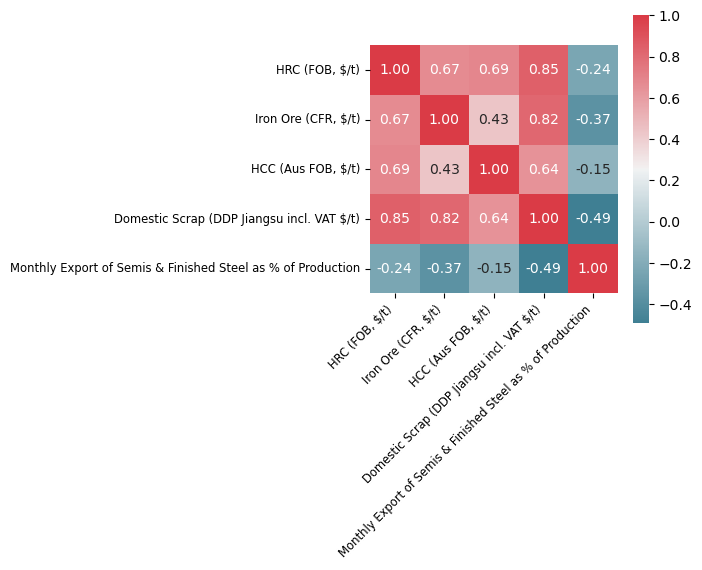

In [25]:
corrdata_rm_exports = df.loc[:, ['HRC (FOB, $/t)', 'Iron Ore (CFR, $/t)', 'HCC (Aus FOB, $/t)', 'Domestic Scrap (DDP Jiangsu incl. VAT $/t)',
                     'Monthly Export of Semis & Finished Steel as % of Production']]
corr_rm_exports = corrdata_rm_exports.corr()

fig = plt.figure(figsize=(4, 4))
sns.heatmap(corr_rm_exports, mask=np.zeros_like(corr_rm_exports), annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, fmt='.2f')
plt.yticks(ha='right', fontsize='small')
plt.xticks(rotation=45, ha='right', fontsize='small')
plt.show()

In [26]:
# Check if outliers still exists in the Monthly Exports as % of Production
df['Monthly Export of Semis & Finished Steel as % of Production'].max()

19.641975308641975